In [28]:
from keras.datasets import mnist

In [29]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [30]:
X_train.shape,X_test.shape,y_test.shape,y_train.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (60000,))

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

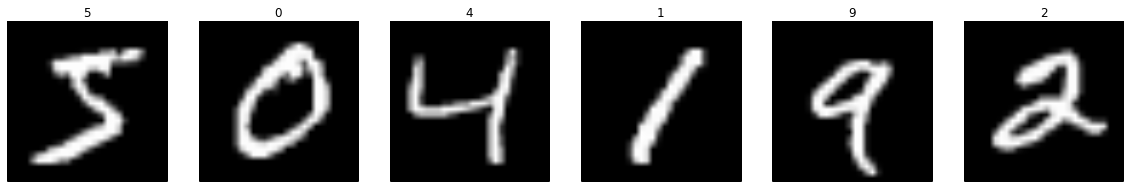

In [32]:
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
    ax.imshow(X_train[i],cmap='gray')
    ax.set_title(str(y_train[i]))

In [33]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [34]:
from keras.utils import np_utils

In [35]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [36]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten

In [37]:
X_train.shape

(60000, 28, 28)

In [38]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [42]:
model.fit(X_train,y_train,batch_size=128, epochs=10, validation_split=0.2,verbose =1,shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s 324us/step - loss: 0.2752 - acc: 0.9152 - val_loss: 0.1261 - val_acc: 0.9633
Epoch 2/10
48000/48000 [==============================] - 14s 290us/step - loss: 0.1119 - acc: 0.9660 - val_loss: 0.1041 - val_acc: 0.9707
Epoch 3/10
48000/48000 [==============================] - 15s 315us/step - loss: 0.0790 - acc: 0.9758 - val_loss: 0.1053 - val_acc: 0.9703
Epoch 4/10
48000/48000 [==============================] - 12s 248us/step - loss: 0.0628 - acc: 0.9812 - val_loss: 0.0892 - val_acc: 0.9763
Epoch 5/10
48000/48000 [==============================] - 16s 335us/step - loss: 0.0527 - acc: 0.9842 - val_loss: 0.0918 - val_acc: 0.9761
Epoch 6/10
48000/48000 [==============================] - 14s 292us/step - loss: 0.0435 - acc: 0.9861 - val_loss: 0.0898 - val_acc: 0.9787
Epoch 7/10
48000/48000 [==============================] - 21s 445us/step - loss: 0.0397 - acc: 0.9883 - val_loss: 0.

In [46]:
model.predict(X_test)

array([[9.8751478e-20, 1.1798031e-16, 9.4671558e-13, ..., 1.0000000e+00,
        2.0487069e-15, 1.2352759e-11],
       [1.7599192e-18, 9.6411689e-12, 1.0000000e+00, ..., 2.0343644e-20,
        4.0326969e-16, 9.9725538e-27],
       [2.9157673e-15, 9.9999988e-01, 2.3117461e-11, ..., 6.1906235e-08,
        6.1426553e-09, 1.7647868e-10],
       ...,
       [5.5097265e-25, 6.5298729e-17, 5.5922379e-20, ..., 1.1725005e-13,
        1.0212770e-14, 2.1786060e-10],
       [1.3150309e-24, 6.9226556e-22, 2.1677678e-28, ..., 6.9160534e-23,
        7.0326765e-11, 1.5955747e-18],
       [5.4730219e-19, 1.1088043e-24, 4.4274227e-19, ..., 2.2938830e-30,
        5.2342687e-16, 7.1369369e-20]], dtype=float32)